# Proyecto final. Datamining.
### Análisis tweets UEFA Champions League Final 2018

### Participantes:

Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro - Alejandro Amarillas Cámara - Sergio Sampio Balmaseda.

### Notebook (2/4). Análisis de Hashtags.

### Objetivo del notebook:

Este notebook se centra en preprocesar el dataset, limpiando las columnas existentes y generando aquellas nuevas que sean necesarias.<br><br>

![title](Images/background.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from Library.Apriori import APriori
from wordcloud import WordCloud, STOPWORDS

In [2]:
Datos = pd.read_json("dataset_tweets.json")
len(Datos)

330384

In [3]:
Hashtags = pd.DataFrame()
Hashtags["hashtag"] = Datos["hashtag"] 
Hashtags = Hashtags[Hashtags["hashtag"] != "-1"]
Hashtags = Hashtags[Hashtags["hashtag"] != -1]
Hashtags = Hashtags.reset_index(drop=True)
Hashtags.head()

,hashtag
0,"[uclfinal, lfc]"
1,"[uclfinal, sportone]"
2,[uclfinal]
3,[uclfinal]
4,"[uclfinal, halamadid]"


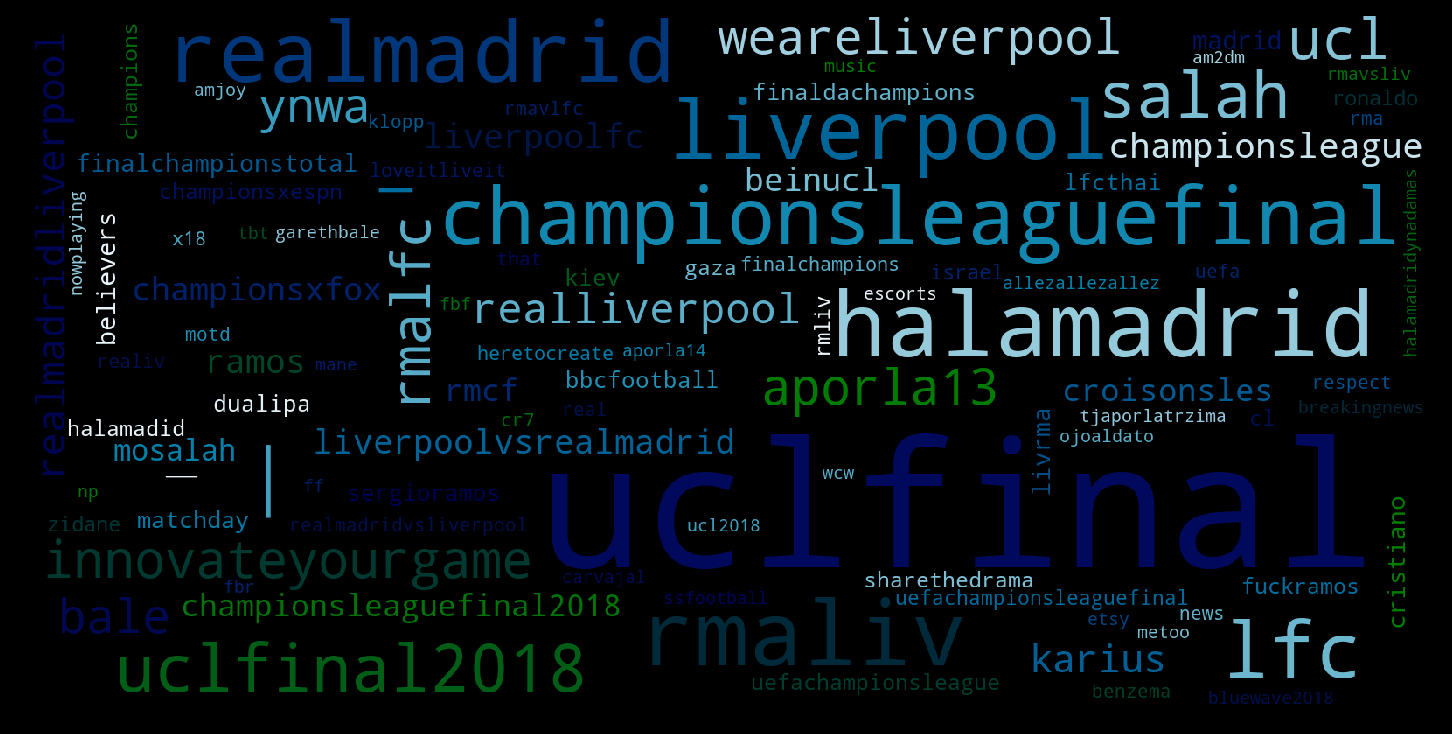

In [8]:
# split sentences to get individual words
all_words = []
for line in Hashtags["hashtag"]: # try 'tokens'
    #print(line)
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=1600,
                      height=800,
                      max_words=100,
                      max_font_size=200,
                      relative_scaling=0.5,
                      colormap="ocean",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [9]:
algoritmo_2 = APriori()
algoritmo_2.Carga(Datos=Hashtags, Columna="hashtag")
algoritmo_2.CalcularReglasDeConfianza(MinimoFreqSop=100, Confianza=80.0, Echo=True)


Iniciando algoritmo apriori para patrones de asociación...

-------

Probando k = 1

Calculando items...

Calculando Frec.Soporte...


KeyboardInterrupt: 

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(df=Datos, source="usuario_nombre_twitter", target=dict(Datos["usuario_nombre_twitter"]), )
nx.draw(G)